In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)


## Simple linear regression Dataset

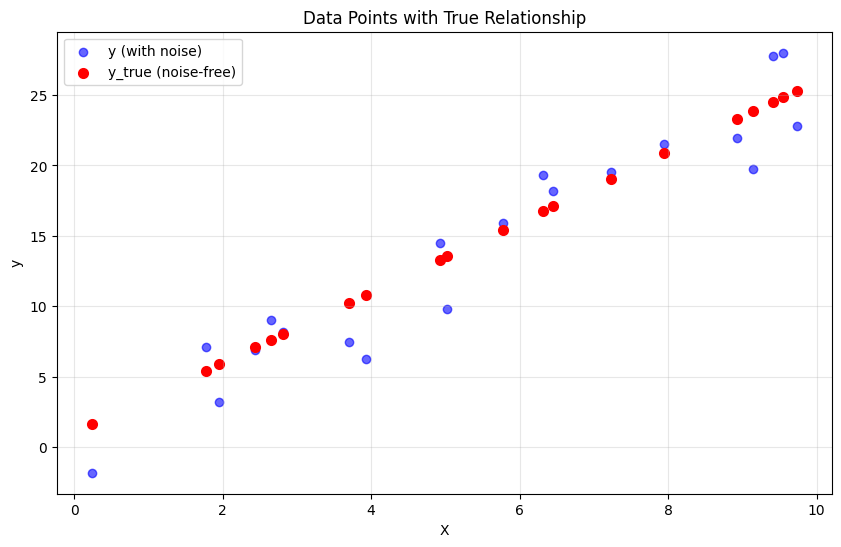

In [13]:
# true data generating function
def affine_transform(X: np.ndarray, w: np.ndarray, b: np.ndarray) -> np.ndarray:
    # Perform affine transformation
    return X @ w + b

N = 20


# Generate 100 random 1D data points in [0, 10]
X = np.random.uniform(0, 10, N)

# Create transformation matrix A and bias vector b
w = np.array([2.5])  # 1x1 matrix for 1D transformation
b = np.array([1.0])    # bias term

# Apply affine transformation to x
y_true = affine_transform(X.reshape(-1, 1), w, b).flatten()

# Add independent Gaussian noise (mean=0, std=0.5)
noise = np.random.normal(0, 3, len(X))
y = y_true + noise

# Plot y over X and y_true over X
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='y (with noise)', color='blue')
plt.scatter(X, y_true, color='red', linewidth=2, label='y_true (noise-free)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points with True Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Compute linear regression using sklearn
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train.reshape(-1, 1), y_train)

# Get the coefficients
slope_sklearn = lr_model.coef_[0]
intercept_sklearn = lr_model.intercept_

print(f"Sklearn Linear Regression solution:")
print(f"Slope (w): {slope_sklearn:.4f}")
print(f"Intercept (b): {intercept_sklearn:.4f}")
print(f"True values - Slope: {w[0]:.4f}, Intercept: {b[0]:.4f}")

# Make predictions on training data
y_train_pred = lr_model.predict(X_train.reshape(-1, 1))

# Calculate R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print(f"R-squared score: {r2:.4f}")


Sklearn Linear Regression solution:
Slope (w): 2.7772
Intercept (b): -1.5788
True values - Slope: 2.5000, Intercept: 1.0000
R-squared score: 0.9178


In [16]:
y_true.shape

(20,)

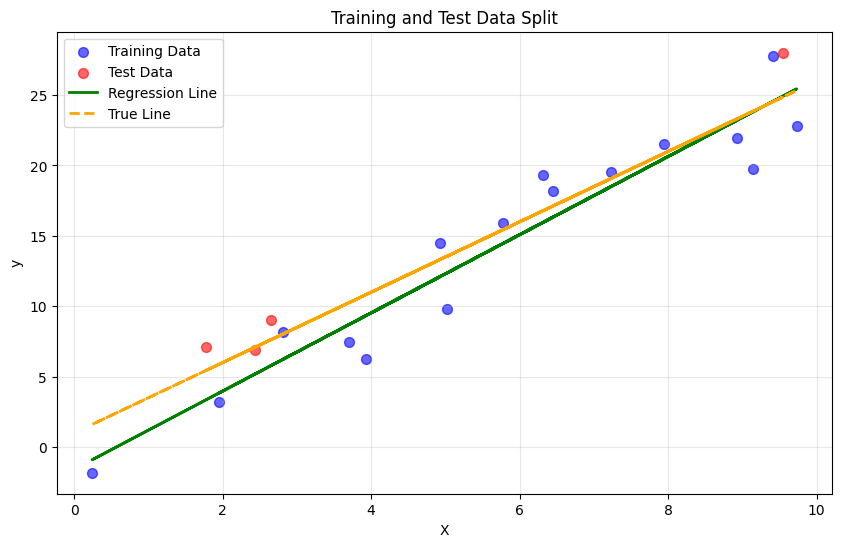

In [17]:
# Plot training and test data
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data', color='blue', s=50)
plt.scatter(X_test, y_test, alpha=0.6, label='Test Data', color='red', s=50)
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.plot(X, y_true, color='orange', linewidth=2, linestyle='--', label='True Line')



plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Data Split')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Gaussian Regression

Text(0.5, 1.0, 'Data Points with True Relationship')

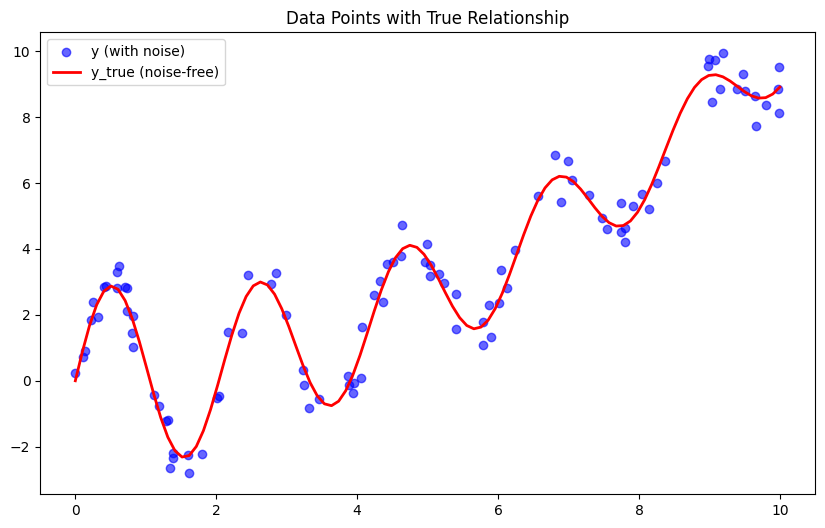

In [107]:
# true data generating function
def f(x):
    return 0.1*x**2 + 3*np.sin(3*x) * np.exp(-0.1*x)

N = 100
X = np.random.uniform(0, 10, N)
x = np.linspace(0, 10, N)
y_true = f(X)

# Add independent Gaussian noise (mean=0, std=0.5)
noise = np.random.normal(0, 0.5, len(X))
y = y_true + noise

# Plot y over X and y_true over X
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='y (with noise)', color='blue')
plt.plot(x, f(x), color='red', linewidth=2, label='y_true (noise-free)')
plt.legend()
plt.title('Data Points with True Relationship')


Text(0.5, 1.0, 'Data Points with True Relationship')

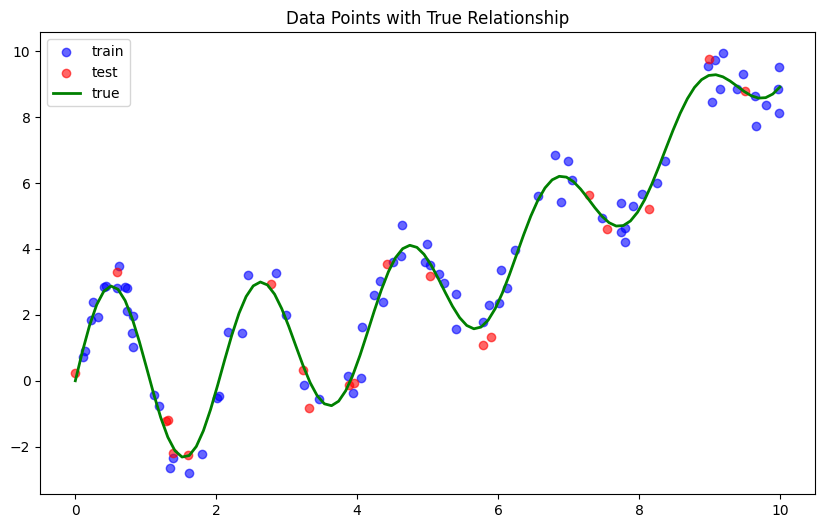

In [131]:
# define a set of F feature functions f_i : R -> R
F = 3

feature_functions = [lambda x, i=i: x**i for i in range(F)]
feature_functions.append(lambda x: np.sin(3*x))

#define a prior over weights w in R^5
mu_0 = np.ones(F+1)
sigma_0 = np.eye(F+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot y over X and y_true over X
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.6, label='train', color='blue')
plt.scatter(X_test, y_test, alpha=0.6, label='test', color='red')
plt.plot(x, f(x), color='green', linewidth=2, label='true')
plt.legend()
plt.title('Data Points with True Relationship')

In [133]:
# data likelihood
features = np.array([f(X_train) for f in feature_functions]).T
mu_y = features @ mu_0
Lambda_y = 0.5 * np.eye(features.shape[0])

In [134]:
#compute the posterior
sigma_prime = sigma_0 - sigma_0 @ features.T @ np.linalg.inv(features @ sigma_0 @ features.T + Lambda_y) @ features @ sigma_0

mu_prime = sigma_prime @ (features.T @ np.linalg.inv(Lambda_y) @ y_train + np.linalg.inv(sigma_0) @ mu_0)

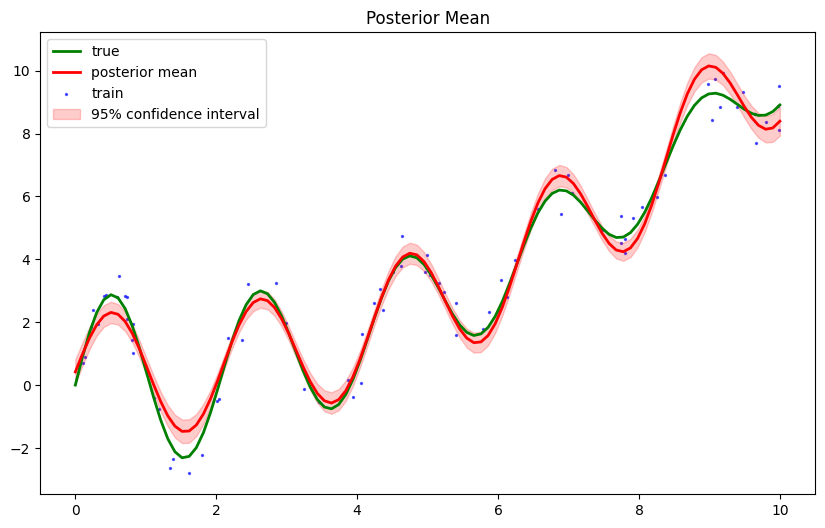

In [142]:
# show function:
test_features = np.array([f(x) for f in feature_functions]).T
y_eval = test_features @ mu_prime
y_eval_0 = test_features @ mu_0
sigma_y_prime = test_features @ sigma_prime @ test_features.T
sigma_y_prime_diag = np.diag(sigma_y_prime)
sigma_y_prime_diag_sqrt = np.sqrt(sigma_y_prime_diag)


#plot the true function and the posterior mean
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), color='green', linewidth=2, label='true')
#plt.plot(x, y_eval_0, linewidth=2, label='prior mean')
plt.plot(x, y_eval, color='red', linewidth=2, label='posterior mean')
plt.scatter(X_train, y_train, alpha=0.6, s=2, label='train', color='blue')
plt.fill_between(x, y_eval - 2*sigma_y_prime_diag_sqrt, y_eval + 2*sigma_y_prime_diag_sqrt, color='red', alpha=0.2, label='95% confidence interval')
plt.legend()
plt.title('Posterior Mean')
plt.show()

Starting iterative posterior update...


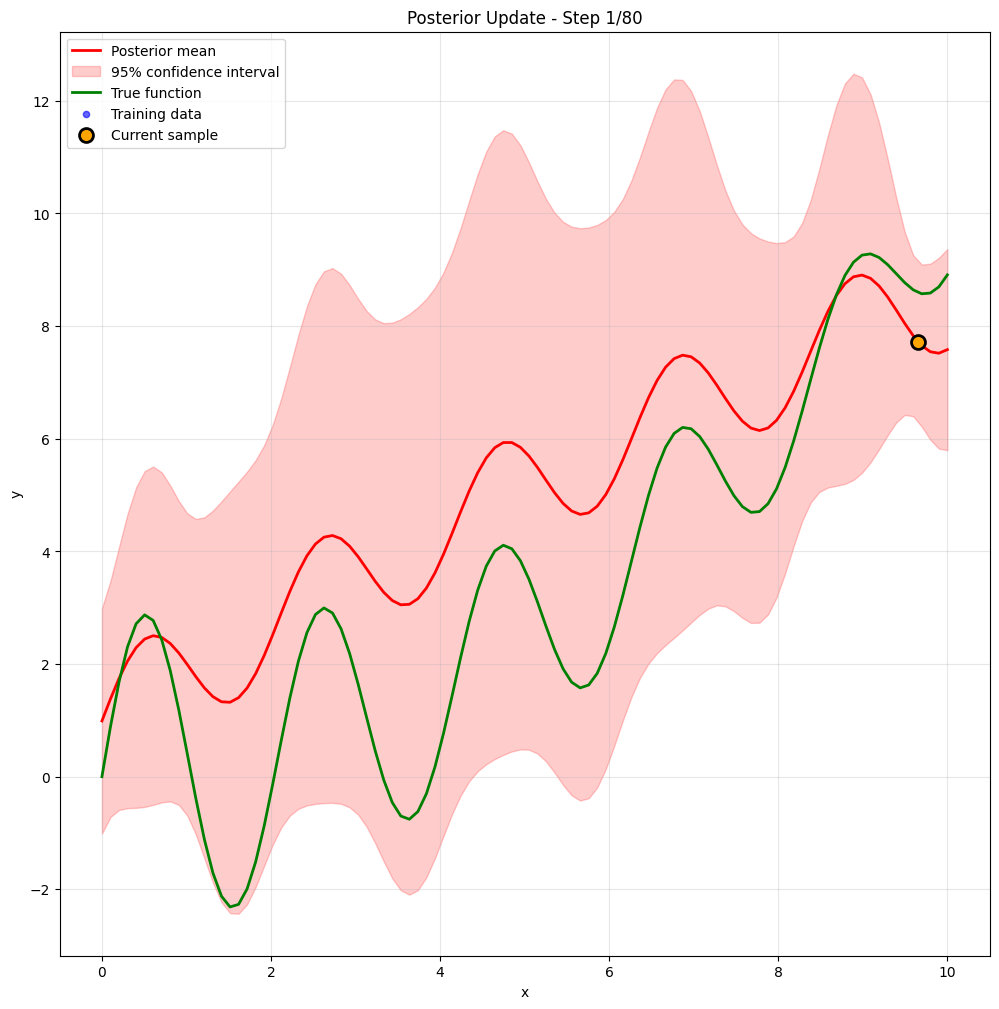

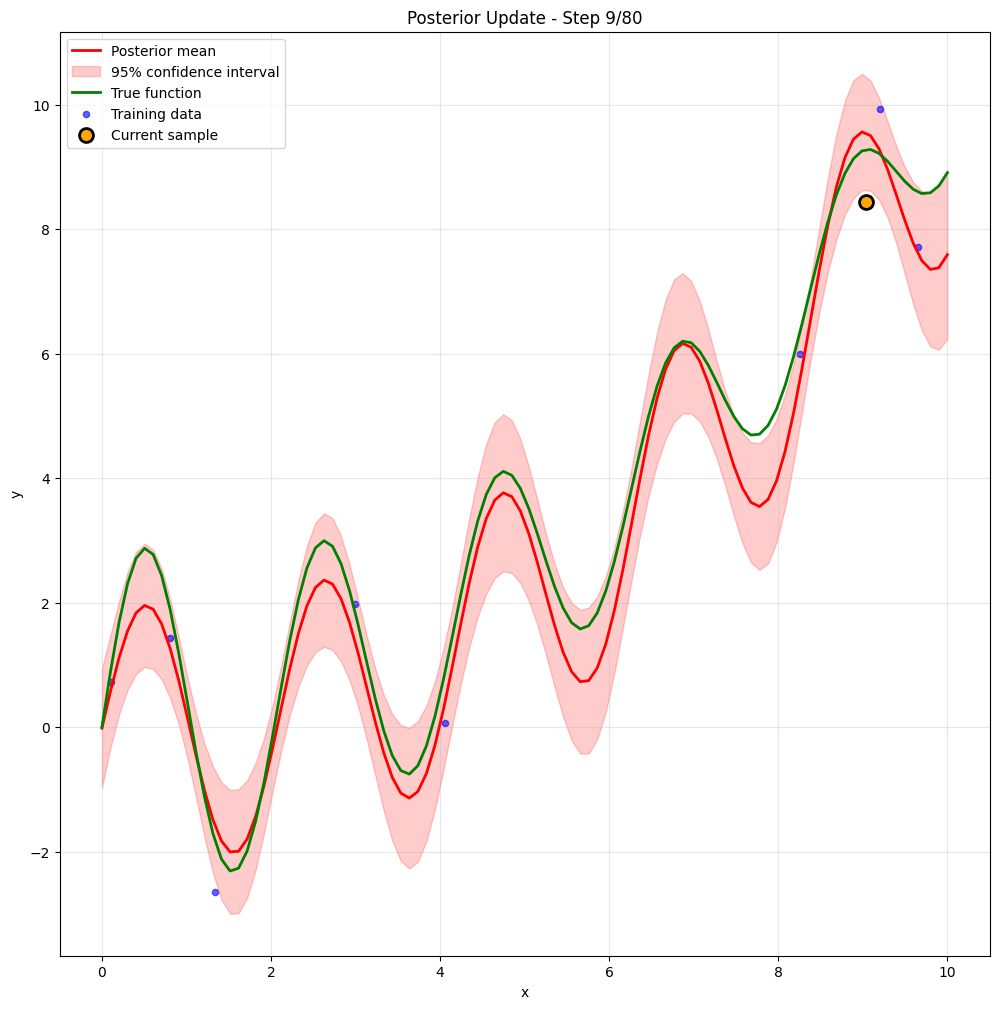

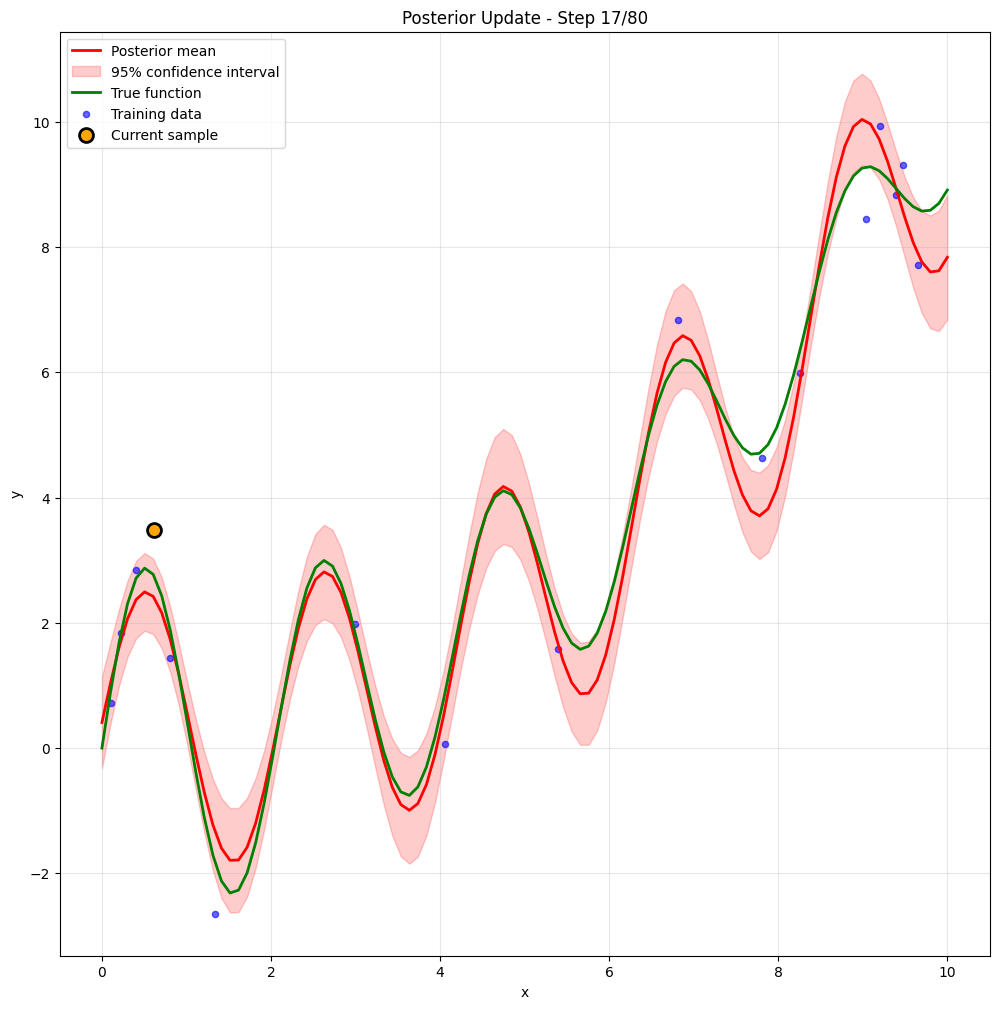

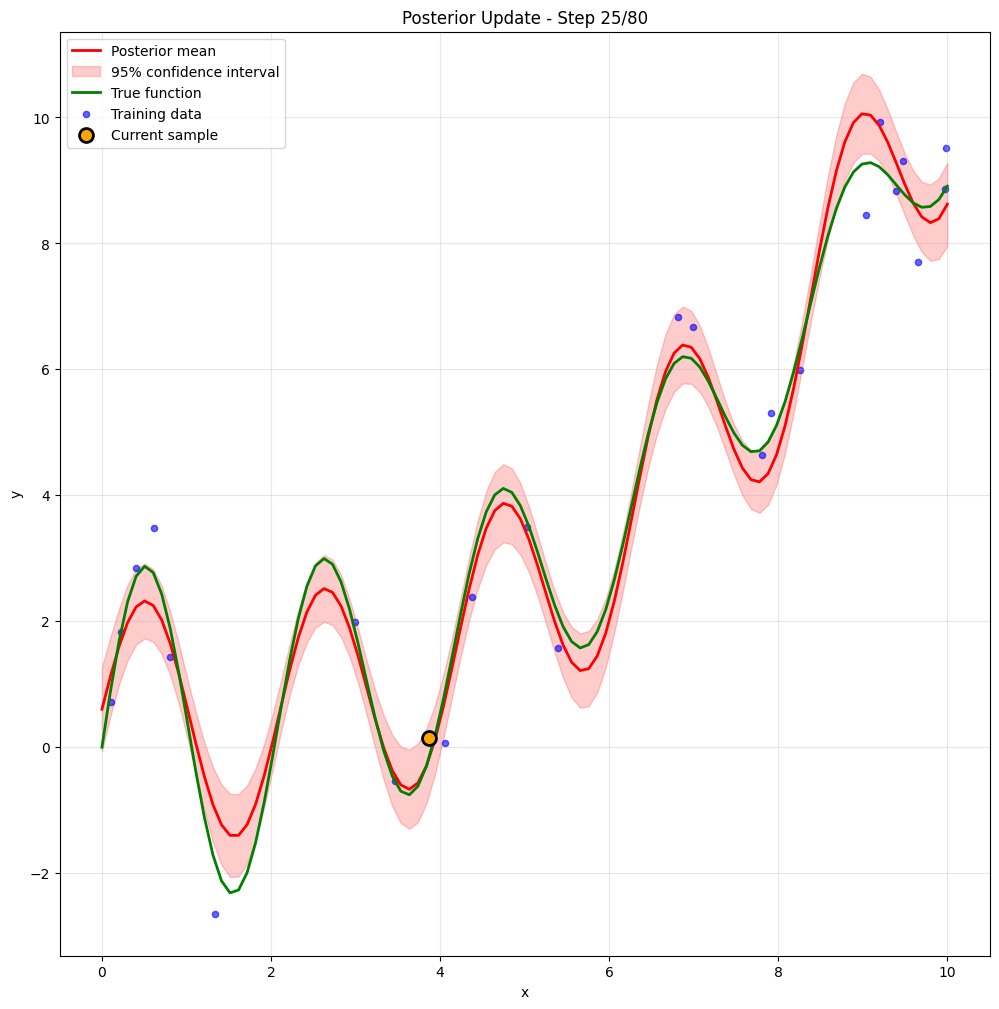

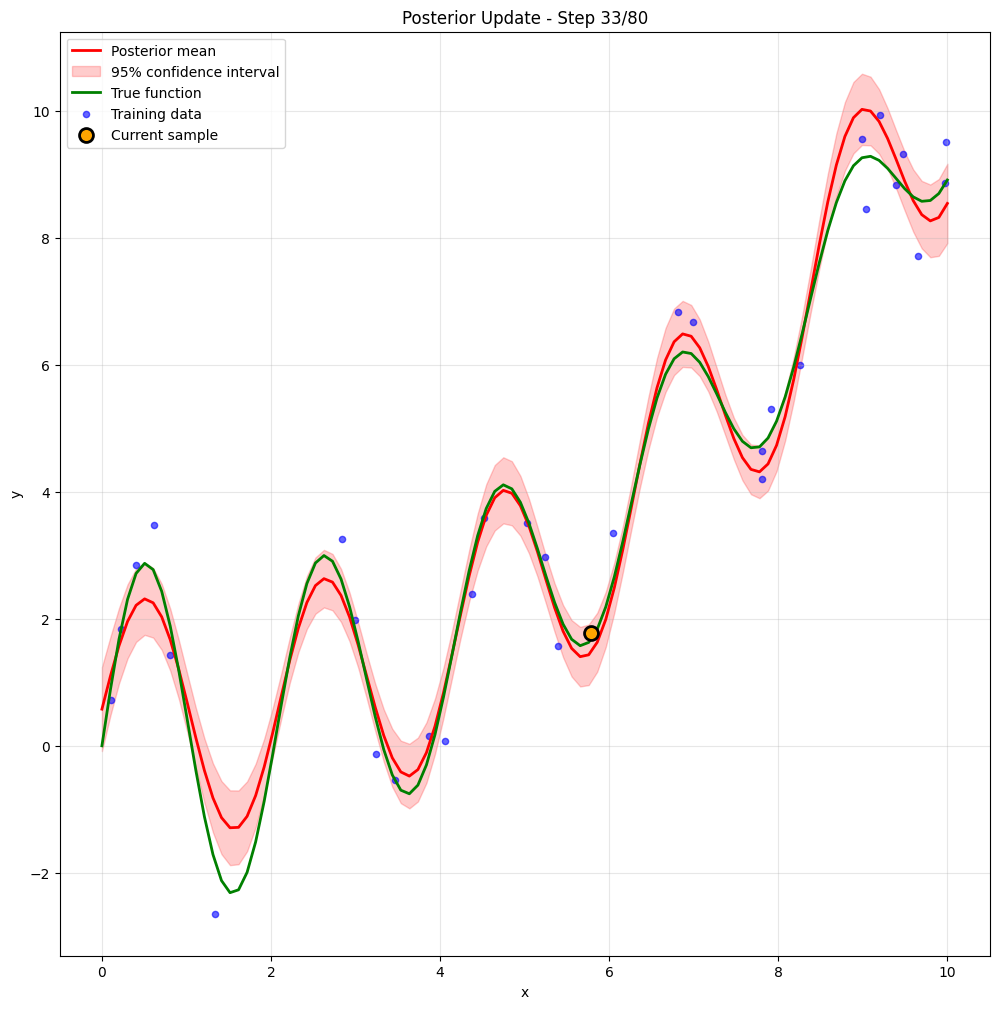

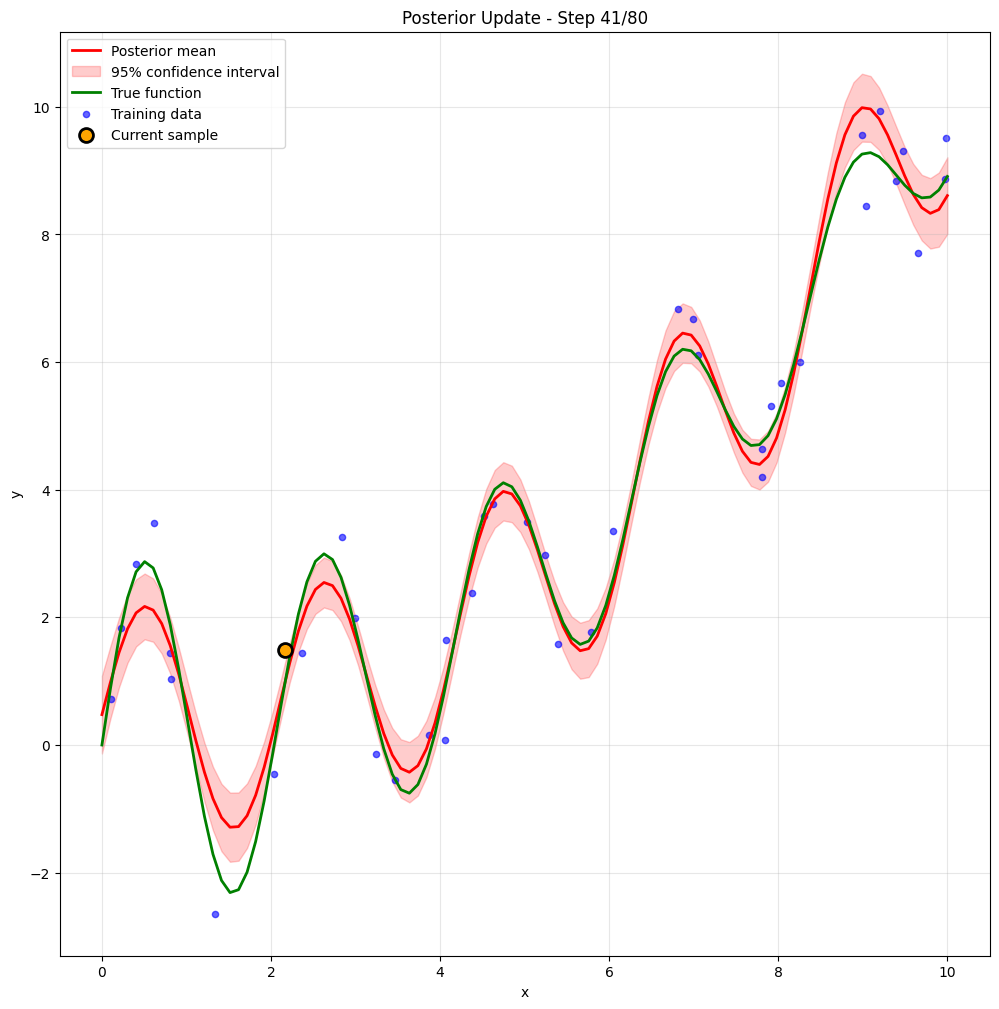

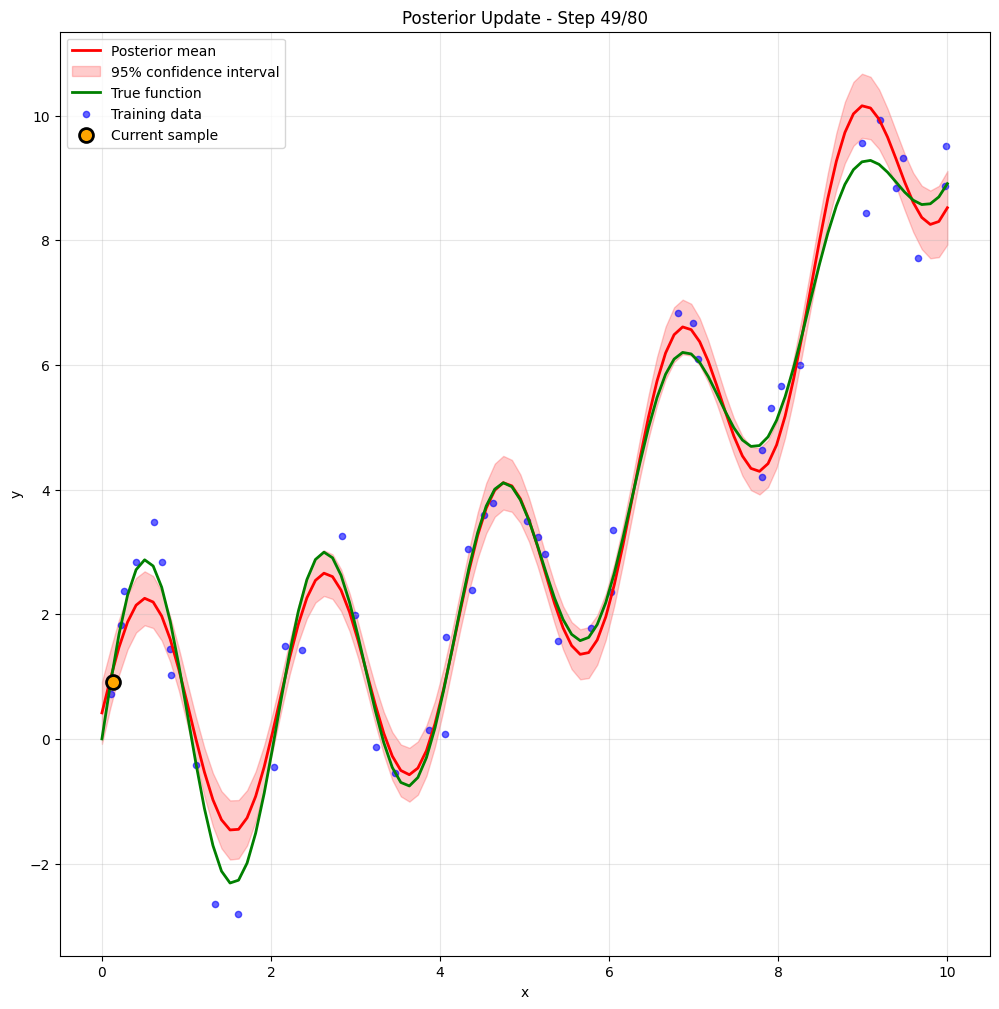

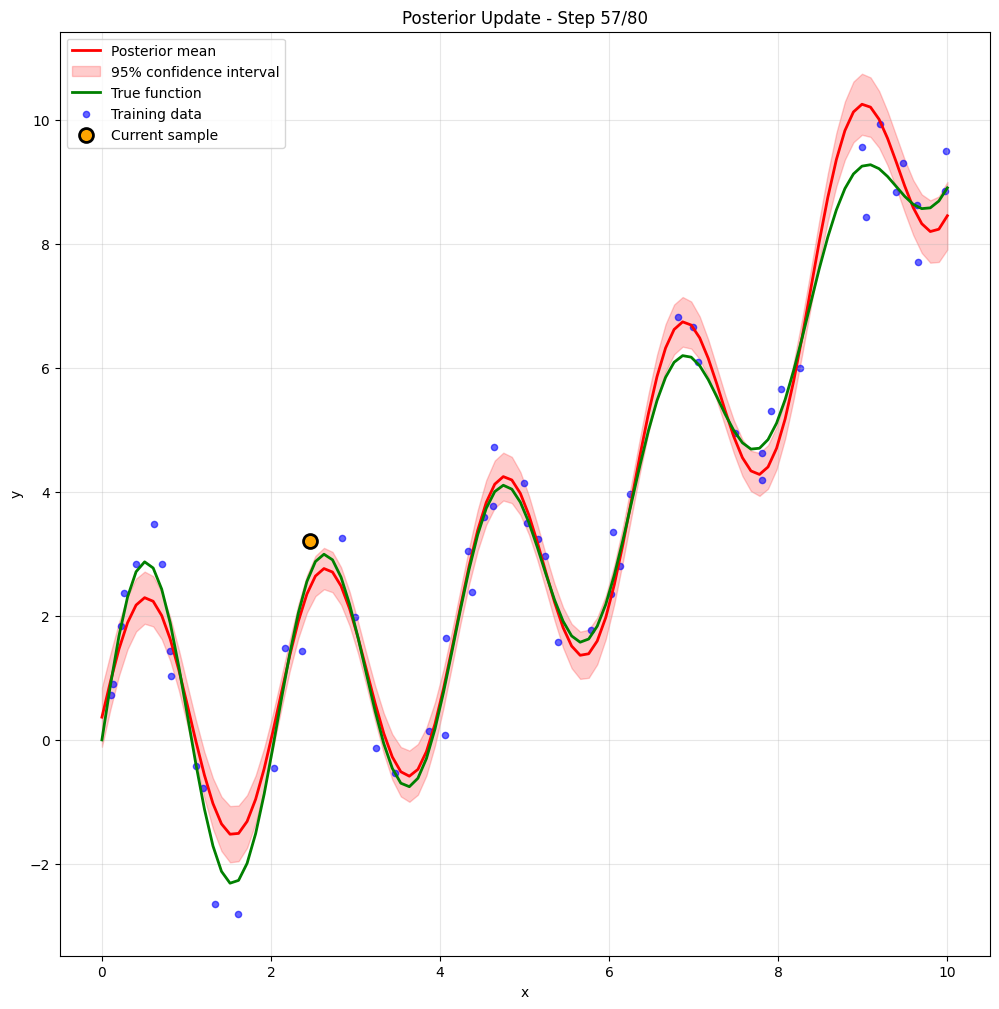

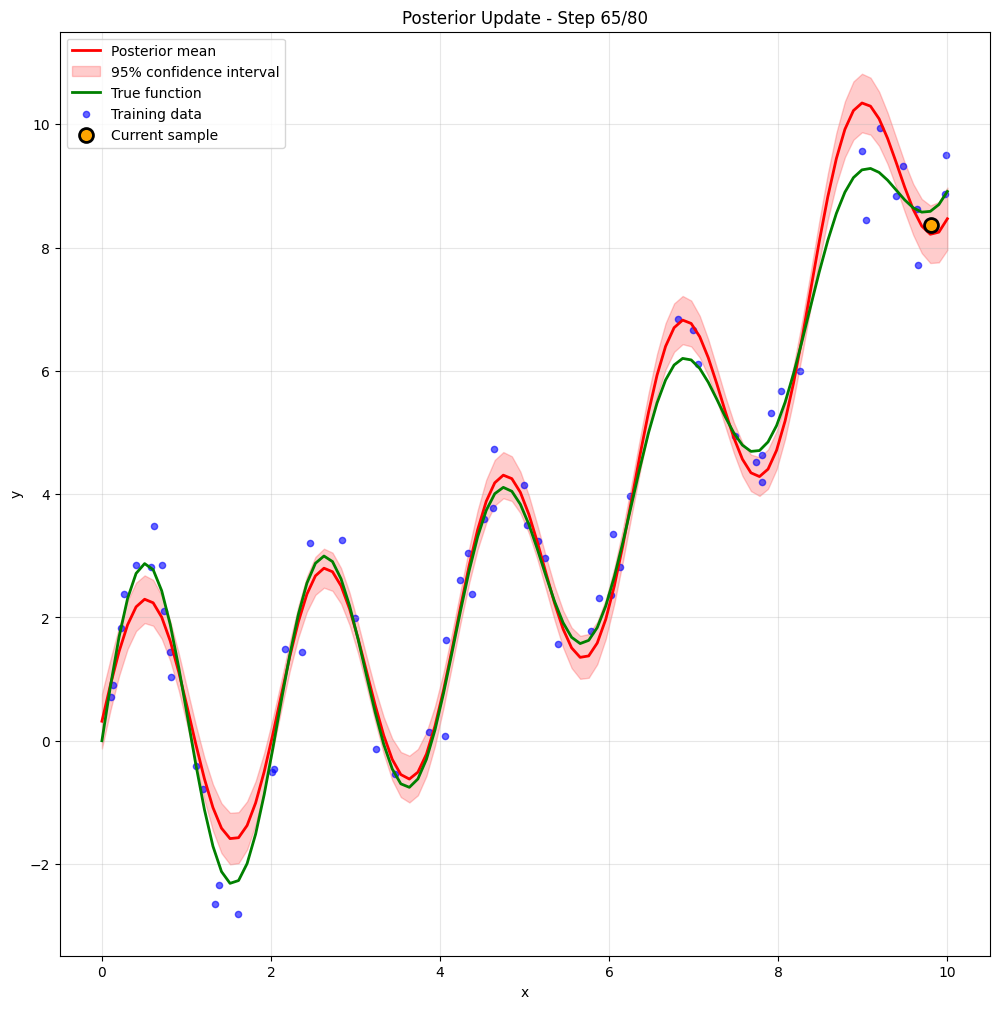

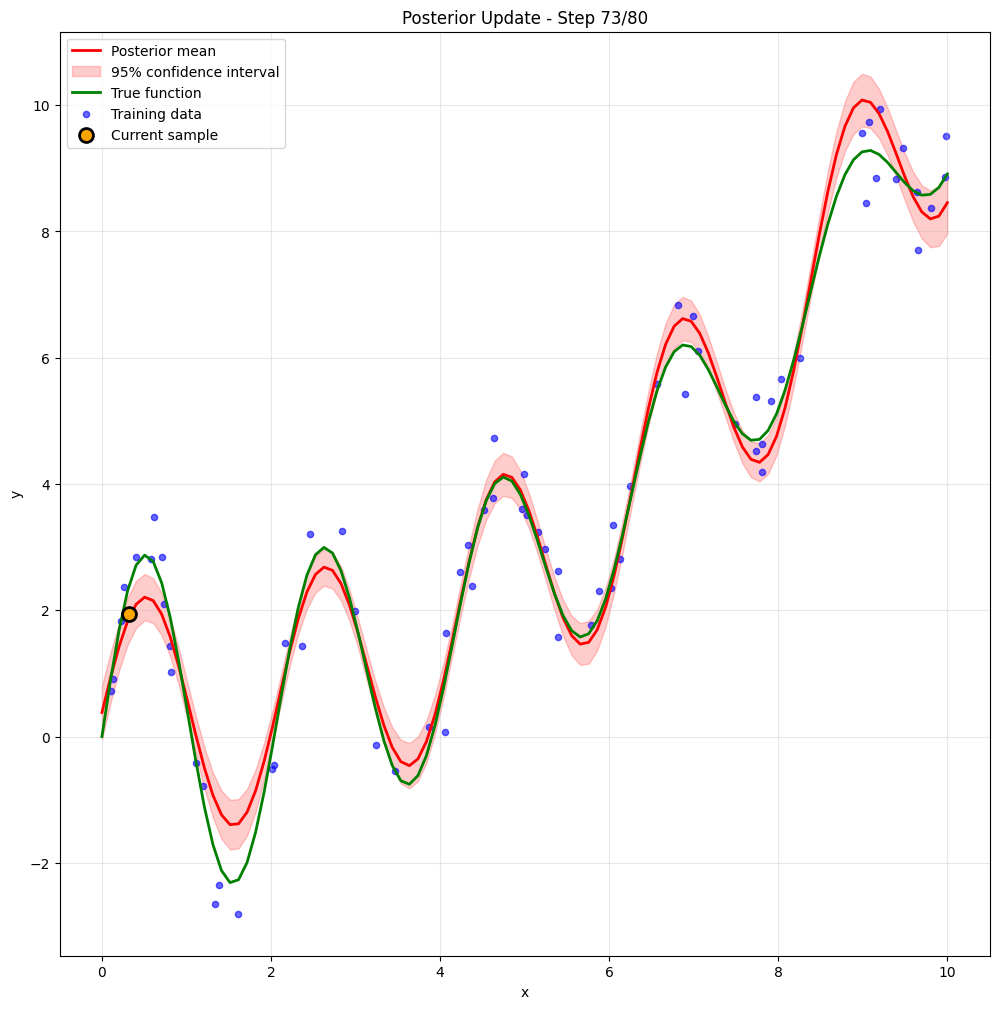

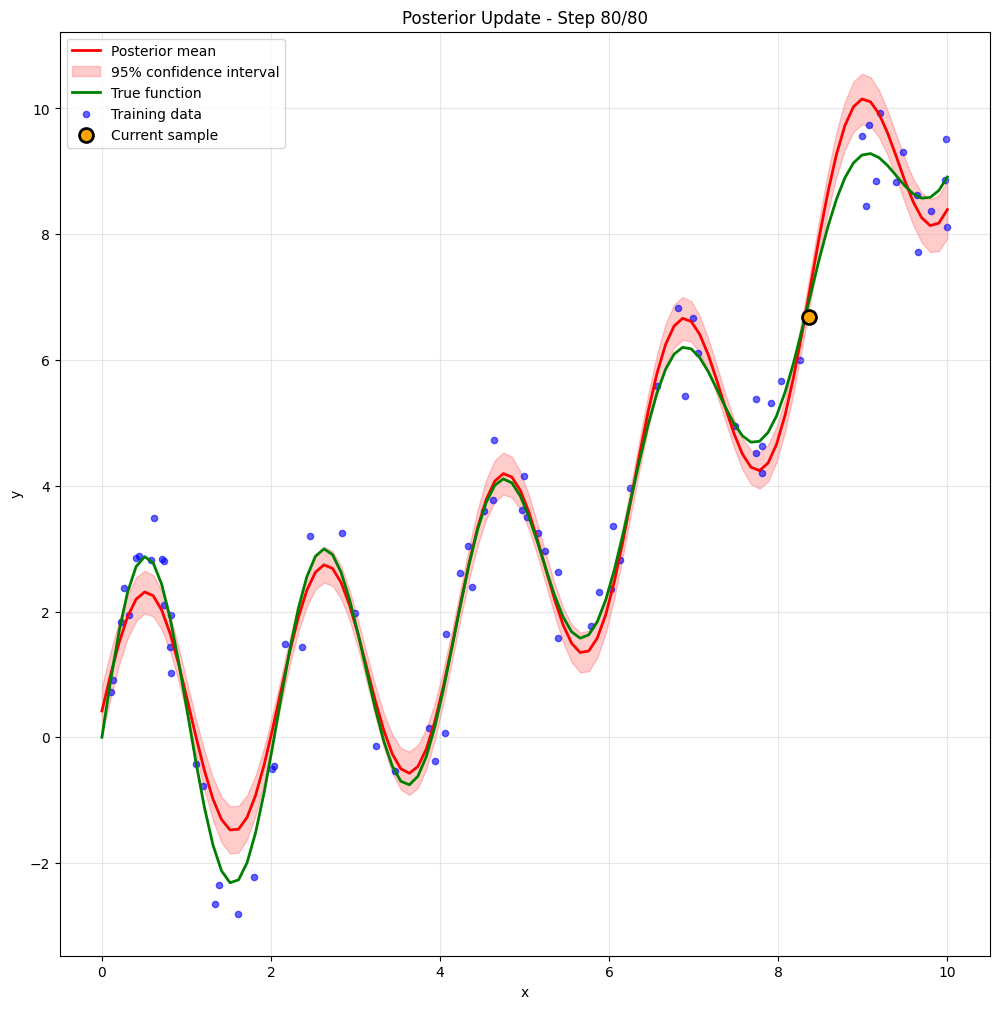

Completed iterative update for 80 samples
Final posterior mean shape: (80, 4)
Final uncertainty shape: (80, 100)
All plots saved to 'posterior_updates/' directory


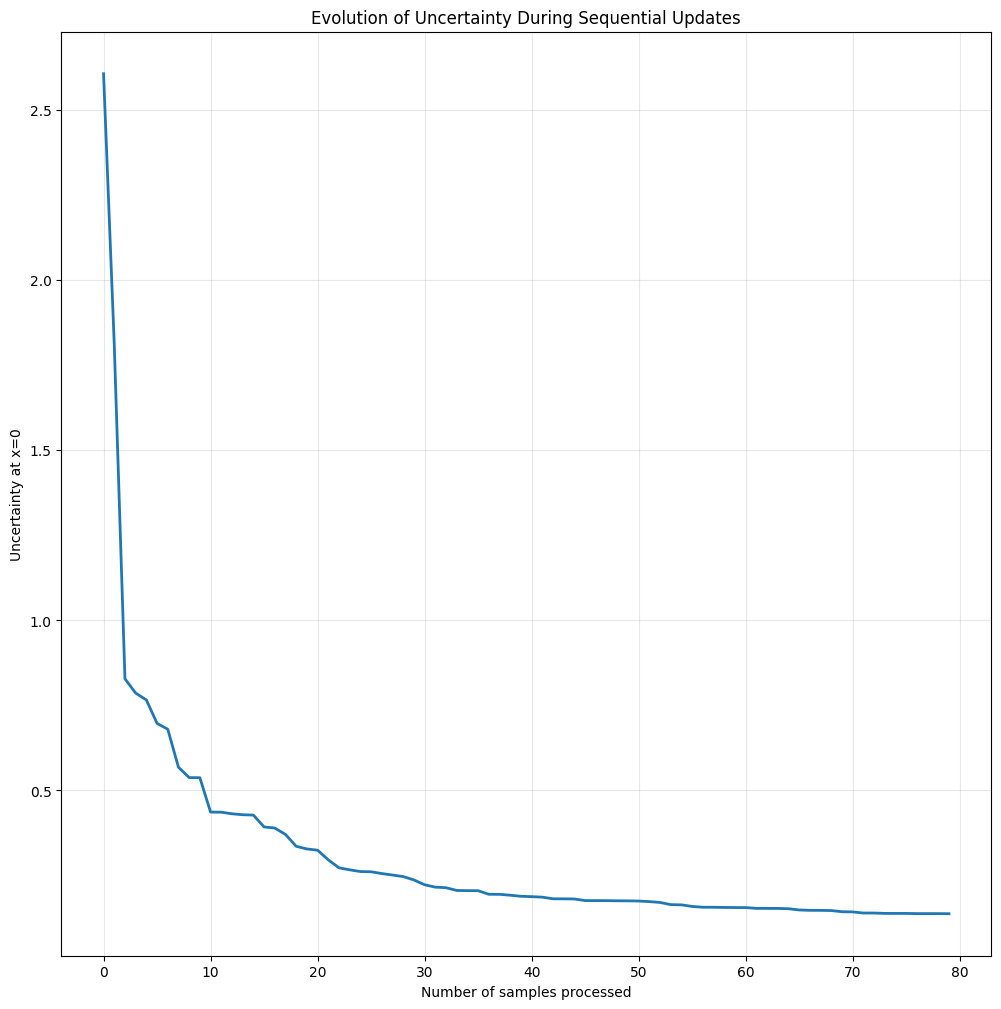

Final posterior mean (iterative): [ 0.41874028 -0.15633998  0.11458955  1.94475461]
Final posterior mean (batch): [ 0.41874028 -0.15634003  0.11458962  1.9447546 ]
Difference: 9.060656083181614e-08


In [ ]:
# Iterative posterior update for each sample
print("Starting iterative posterior update...")

# Initialize with prior
current_mu = mu_0.copy()
current_sigma = sigma_0.copy()

# Store posterior means for each step
posterior_means = []
posterior_uncertainties = []

# Create directory for saving plots if it doesn't exist
import os
plot_dir = "posterior_updates"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

for i, (x_sample, y_sample) in enumerate(zip(X_train, y_train)):
    # Create feature vector for this sample
    sample_features = np.array([f(x_sample) for f in feature_functions]).reshape(-1, 1)
    
    # Update posterior using this single sample
    # Kalman filter update equations
    K = current_sigma @ sample_features @ np.linalg.inv(sample_features.T @ current_sigma @ sample_features + 0.5)
    current_mu = current_mu + K @ (y_sample - sample_features.T @ current_mu)
    current_sigma = current_sigma - K @ sample_features.T @ current_sigma
    
    # Store current posterior mean
    posterior_means.append(current_mu.copy())
    
    # Compute uncertainty at test points
    test_features = np.array([f(x) for f in feature_functions]).T
    sigma_y_current = test_features @ current_sigma @ test_features.T
    sigma_y_diag = np.diag(sigma_y_current)
    posterior_uncertainties.append(np.sqrt(sigma_y_diag))
    
    # Create and save plot for every single update
    plt.figure(figsize=(12, 8))
    
    # Plot posterior mean
    y_current = test_features @ current_mu
    plt.plot(x, y_current, color='red', linewidth=2, label='Posterior mean')
    
    # Plot uncertainty bands (2 standard deviations)
    plt.fill_between(x, 
                    y_current - 2 * np.sqrt(sigma_y_diag), 
                    y_current + 2 * np.sqrt(sigma_y_diag), 
                    color='red', alpha=0.2, label='95% confidence interval')
    
    # Plot true function
    plt.plot(x, f(x), color='green', linewidth=2, label='True function')
    
    # Plot all training data seen so far
    plt.scatter(X_train[:i+1], y_train[:i+1], alpha=0.6, s=20, color='blue', label='Training data')
    
    # Highlight the current sample being used for update
    plt.scatter([x_sample], [y_sample], s=100, color='orange', edgecolors='black', 
               linewidth=2, zorder=5, label='Current sample')
    
    plt.legend()
    plt.title(f'Posterior Update - Step {i+1}/{len(X_train)}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    
    # Save the plot as PNG
    plt.savefig(f'{plot_dir}/posterior_update_step_{i+1:03d}.png', dpi=150, bbox_inches='tight')
    plt.close()  # Close the figure to free memory
    
    # Show plot only for selected steps to avoid too many displays
    plot_every = max(1, len(X_train) // 10)  # Show ~10 plots
    if i % plot_every == 0 or i == len(X_train) - 1:
        plt.figure(figsize=(12, 8))
        
        # Plot posterior mean
        plt.plot(x, y_current, color='red', linewidth=2, label='Posterior mean')
        
        # Plot uncertainty bands (2 standard deviations)
        plt.fill_between(x, 
                        y_current - 2 * np.sqrt(sigma_y_diag), 
                        y_current + 2 * np.sqrt(sigma_y_diag), 
                        color='red', alpha=0.2, label='95% confidence interval')
        
        # Plot true function
        plt.plot(x, f(x), color='green', linewidth=2, label='True function')
        
        # Plot all training data seen so far
        plt.scatter(X_train[:i+1], y_train[:i+1], alpha=0.6, s=20, color='blue', label='Training data')
        
        # Highlight the current sample being used for update
        plt.scatter([x_sample], [y_sample], s=100, color='orange', edgecolors='black', 
                   linewidth=2, zorder=5, label='Current sample')
        
        plt.legend()
        plt.title(f'Posterior Update - Step {i+1}/{len(X_train)}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True, alpha=0.3)
        plt.show()

# Convert to arrays
posterior_means = np.array(posterior_means)
posterior_uncertainties = np.array(posterior_uncertainties)

print(f"Completed iterative update for {len(X_train)} samples")
print(f"Final posterior mean shape: {posterior_means.shape}")
print(f"Final uncertainty shape: {posterior_uncertainties.shape}")
print(f"All plots saved to '{plot_dir}/' directory")

# Plot uncertainty evolution
plt.figure(figsize=(12, 6))
uncertainty_at_midpoint = posterior_uncertainties[:, len(x)//2]
plt.plot(uncertainty_at_midpoint, linewidth=2)
plt.xlabel('Number of samples processed')
plt.ylabel('Uncertainty at x=0')
plt.title('Evolution of Uncertainty During Sequential Updates')
plt.grid(True, alpha=0.3)
plt.show()

print("Final posterior mean (iterative):", posterior_means[-1])
print("Final posterior mean (batch):", mu_prime)
print("Difference:", np.linalg.norm(posterior_means[-1] - mu_prime))

